# **Map Testing Data Review**

Using the data from map testing ove the course of the previous year I put together this workbook to better explore what was happening with my students. 
For anyone unfamiliar with MAP testing, it is a growth monitoring testing service used in education. We specifically use it to monitor that are students are actually making progress. The test is nationally normed so we are able to determine the comparison of our students to students nation wide. 
For the privacy of students all names have been removed and replaced with a single or double digit id.
If you have any questions please feel free to contact me.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import plotly.express as px

In [2]:
from google.colab import files
uploaded = files.upload()

Saving map growth csv - Sheet1.csv to map growth csv - Sheet1.csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['map growth csv - Sheet1.csv']))
# Dataset is now stored in a Pandas Dataframe
df2

,Grade,Name,Fall,Winter,Change,Spring Goal,Spring Actual,Spring Growth from fall,Spring growth from winter,Met goal?
0,8,1,215,218.0,3.0,221.0,226,11,8,yes
1,8,2,223,226.0,3.0,229.0,230,7,4,yes
2,8,3,225,226.0,1.0,229.0,226,1,0,no
3,8,4,229,233.0,4.0,237.0,240,11,7,yes
4,8,5,230,225.0,-5.0,232.0,234,4,9,yes
5,8,6,238,245.0,7.0,248.0,242,4,-3,no
6,8,7,242,241.0,-1.0,245.0,240,-2,-1,no
7,9,8,214,222.0,8.0,226.0,226,12,4,no
8,9,9,220,232.0,12.0,238.0,243,23,11,yes
9,9,10,226,229.0,3.0,232.0,238,12,9,yes


In [4]:
df2['fall_winter_grow']=(df2['Change']>0)
df2['fall_spring_grow']=(df2['Spring Growth from fall']>0)
df2['winter_spring_grow']=(df2['Spring growth from winter']>0)
df2

,Grade,Name,Fall,Winter,Change,Spring Goal,Spring Actual,Spring Growth from fall,Spring growth from winter,Met goal?,fall_winter_grow,fall_spring_grow,winter_spring_grow
0,8,1,215,218.0,3.0,221.0,226,11,8,yes,True,True,True
1,8,2,223,226.0,3.0,229.0,230,7,4,yes,True,True,True
2,8,3,225,226.0,1.0,229.0,226,1,0,no,True,True,False
3,8,4,229,233.0,4.0,237.0,240,11,7,yes,True,True,True
4,8,5,230,225.0,-5.0,232.0,234,4,9,yes,False,True,True
5,8,6,238,245.0,7.0,248.0,242,4,-3,no,True,True,False
6,8,7,242,241.0,-1.0,245.0,240,-2,-1,no,False,False,False
7,9,8,214,222.0,8.0,226.0,226,12,4,no,True,True,True
8,9,9,220,232.0,12.0,238.0,243,23,11,yes,True,True,True
9,9,10,226,229.0,3.0,232.0,238,12,9,yes,True,True,True


In [5]:
fig = px.scatter(df2, x="Grade", y="Fall",
                 title="Fall Test Scores", color="fall_winter_grow"
                )

fig.show()

In [6]:
fig = px.scatter(df2, x="Grade", y="Winter",
                 title="Winter Test Scores", color = "fall_winter_grow"
                )

fig.show()

In [7]:
fig = px.scatter(df2, x="Grade", y="Spring Actual",
                 title="Spring Test Scores", color = "winter_spring_grow"
                )

fig.show()

In [52]:
data = [df2["fall_spring_grow"], df2["fall_winter_grow"], df2["winter_spring_grow"]]

headers = ["fsgc", "fwgc", "wsgc"]

df3 = pd.concat(data, axis=1, keys=headers)
df3

,fsgc,fwgc,wsgc
0,True,True,True
1,True,True,True
2,True,True,False
3,True,True,True
4,True,False,True
5,True,True,False
6,False,False,False
7,True,True,True
8,True,True,True
9,True,True,True


In [53]:
df4 = df3.apply(pd.value_counts)
print (df4)

       fsgc  fwgc  wsgc
True     33    34    21
False     9     8    21


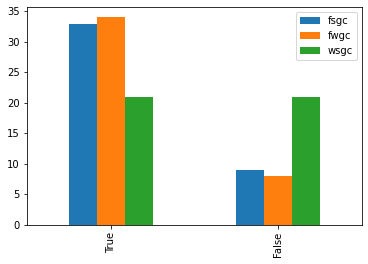

In [54]:
df4.plot.bar()

I will now make a bar chart to represent the students who grow, stayed the same, or shrunk in between each testing period.

In [16]:
from google.colab import files
uploaded = files.upload()

Saving map data wide - Sheet1.csv to map data wide - Sheet1.csv


In [17]:
import io
dfw = pd.read_csv(io.BytesIO(uploaded['map data wide - Sheet1.csv']))
# Dataset is now stored in a Pandas Dataframe
dfw

,Season,grade,student id,score
0,1,8,1,215.0
1,1,8,2,223.0
2,1,8,3,225.0
3,1,8,4,229.0
4,1,8,5,230.0
...,...,...,...,...
121,3,10,38,263.0
122,3,11,39,240.0
123,3,11,40,241.0
124,3,11,41,257.0


In [18]:
plt.style.use('seaborn-whitegrid')

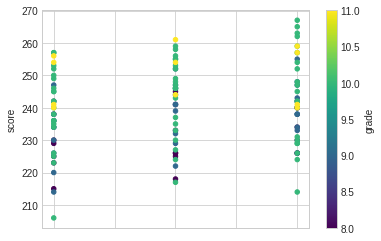

In [22]:
ax1 = dfw.plot.scatter(x='Season',
                      y='score',
                      c='grade',
                       colormap = 'viridis')

In [26]:
dfw.isnull().any()

Season        False
grade         False
student id    False
score          True
dtype: bool

In [27]:
dfw =dfw.fillna(method='ffill')

In [28]:
dfw.isnull().any()

Season        False
grade         False
student id    False
score         False
dtype: bool

In [54]:
from sklearn.linear_model import LinearRegression
X = dfw.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = dfw.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

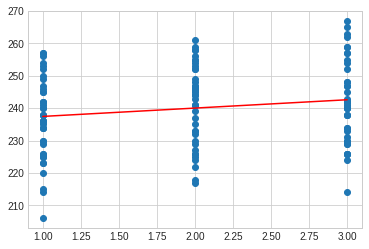

In [55]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [56]:
print('Coefficients: \n', linear_regressor.coef_)

Coefficients: 
 [[2.57142857]]


This data would suggest that the on average my students grew about 2.6 points per map test period.

Below I will sperate the dataframe into smaller dataframes represented by grades

In [35]:
res_8 = dfw[dfw['grade']==8]
print(res_8.shape)

(21, 4)


In [36]:
res_9 = dfw[dfw['grade']==9]
print(res_9.shape)

(30, 4)


In [37]:
res_10 = dfw[dfw['grade']==10]
print(res_10.shape)

(63, 4)


In [38]:
res_11 = dfw[dfw['grade']==11]
print(res_11.shape)

(12, 4)


I will now look at the trendlines for each class.

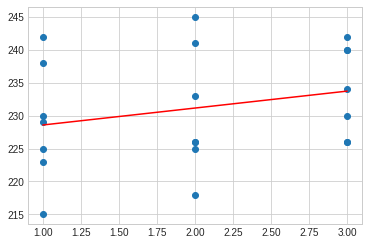

In [52]:
X = res_8.iloc[:, 0].values.reshape(-1, 1)
Y = res_8.iloc[:, 3].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [53]:
print('Coefficients: \n', linear_regressor.coef_)

Coefficients: 
 [[2.57142857]]


This data suggests that the 8th grade students grow by about 2.6 points per map test period

For 9th Grade

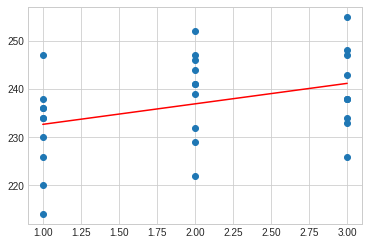

In [50]:
X = res_9.iloc[:, 0].values.reshape(-1, 1)
Y = res_9.iloc[:, 3].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [51]:
print('Coefficients: \n', linear_regressor.coef_)

Coefficients: 
 [[4.25]]


The data sugfests that the students in 9th grade are growing at a rate of 4.25 points per map test period.

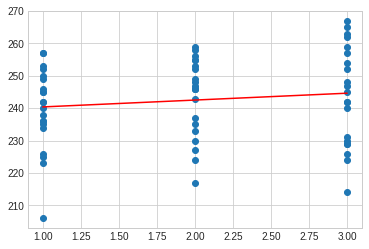

In [48]:
X = res_10.iloc[:, 0].values.reshape(-1, 1)
Y = res_10.iloc[:, 3].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [49]:
print('Coefficients: \n', linear_regressor.coef_)

Coefficients: 
 [[2.11904762]]


This data suggests that sutdents in the 10th grade are growing at a rate of 2.1 points per map test period.

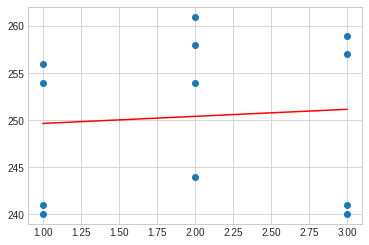

In [42]:
X = res_11.iloc[:, 0].values.reshape(-1, 1)
Y = res_11.iloc[:, 3].values.reshape(-1, 1)
linear_regressor = LinearRegression() 
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [47]:
print('Coefficients: \n', linear_regressor.coef_)

Coefficients: 
 [[0.75]]


This data suggests that the students in 11th grade are growing at an average rate of .75 points per map test period.

# **Conclusions**

The first interesting find from the data is that the highest level class, the less growth we see. This is somewhat expected as these sutdents are already at a high level. They have also already covered most if not all of what is considered normal high school math. Thus what we have been covering is more college level material and results of growth at a high school level would be minimal. 

Another trend that we saw is that the other students all averaged about a 2.5 point growth per testing period. This means over the course of the year a student should grow close to 5.3 poits. This is a substantial growth and shows that students are actually benefiting from the education that they are getting.

Looking back to the bar chart shows some interesing information. While a very high percentage grew from fall to winter, and from fall to spring, in the period from winter to spring we actually only had 50% grow. The other 50% either stayed the same or went down. I think that the main reason we see this is because they are ready to be done with school. A lot of students may not have tried as hard. I am noticing in my studetns homework, quiz, and tests scores that the past several weeks students have not done as well. Students are forgetting to turn in work. They seem to be ready to be done. I find that this is usual for this time of year. I did not expect it to have this big of an impact on map testing though.

All in all I am extremely happy with this data. The thing that pleased me the most was the growth in the lowest level students. Looking back at the first regression plot you are able to see how the average students at the bottom of the chart almost all grew by almost 10 points. That is awsome for any group, but exceptional considering it was my lowest preformers.